# Finding Customer Insights

---
 Needed to answer or explore things as below :

*   What is the overall customer response?
*   Which group of customers are loyal?
*   Predicting customers and their personality



# Data wrangling



*   Importing data set from my github repository
*   Explore Data and description
*   Identify and handle missing values
*   Data Formating
*   Data Standardization & normalization







In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://github.com/mdimran1/Dataset/blob/main/marketing_campaign.csv?raw=true', sep='\t') 


## Explore data and feature description







<b>Dataset contains total 2240 records and 29 features. Target column or 

feature is response which indicates binary records of the latest promotion that customers has been taken. Primary Feature decription are as below :</b>



0   ID : Customer's unique identity

1   Year_Birth : Customer's birth year & easy to find age

2   Education : Maximum education level

3   Marital_Status : married or others

4   Income : Amount of earning, Needed to normalize or binning 

5   Kidhome : No. of kids [ according google teen ages = under 12]

6   Teenhome : No. of teens [ according google teen ages = 13 to 19]

7   Dt_Customer : When customers are envolved

8   Recency : count of days last ordered

9   MntWines : Total amount as spent on wine

10   MntFruits : Total amount as spent on Fruits

11   MntMeatProducts : Total amount as spent on Meat

12   MntFishProducts : Total amount as spent on Fish

13   MntSweetProducts : Total amount as spent on Sweet

14   MntGoldProds : Total amount as spent on Gold

15   NumDealsPurchases : Counts of purchases with discount

16   NumWebPurchases : purchased by company’s web site

17   NumCatalogPurchases : Number of purchases made using a catalogue

18   NumStorePurchases : Number of purchases from store

19   NumWebVisitsMonth : Number of visits to company’s web site 

20   AcceptedCmp3 : Does customer accepted the offer campaign 3?

21   AcceptedCmp4 : Does customer accepted the offer campaign 4?

22   AcceptedCmp5 : Does customer accepted the offer campaign 5?

23   AcceptedCmp1 : Does customer accepted the offer campaign 1?

24   AcceptedCmp2 : Does customer accepted the offer campaign 2?

25   Complain : Has any cpmplain? (1 or 0)

26   Z_CostContact : This feature has constant 3 only

27   Z_Revenue : This feature has constant 11 only

28   Response: Target feature

In [2]:
# data sample with both top & last 5 records
data.head(-5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2230,7004,1984,Graduation,Single,11012.0,1,0,16-03-2013,82,24,3,26,7,1,23,3,3,1,2,9,1,0,0,0,0,0,3,11,0
2231,9817,1970,Master,Single,44802.0,0,0,21-08-2012,71,853,10,143,13,10,20,2,9,4,12,8,0,0,0,0,0,0,3,11,0
2232,8080,1986,Graduation,Single,26816.0,0,0,17-08-2012,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


In [3]:
# total rows and columns
print(f'Total rows : {data.shape[0]}')
print(f'Total columns : {data.shape[1]}') 

Total rows : 2240
Total columns : 29


In [22]:
# data information with data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [5]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [6]:
data.describe(include=object)

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### column values summery

In [25]:
# explore column values
for i in data.columns:
  print(i)
  print (data[i].value_counts())
  print()


ID
2546     1
967      1
5396     1
5394     1
7441     1
        ..
5654     1
2698     1
11133    1
3389     1
0        1
Name: ID, Length: 2240, dtype: int64

Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1977    52
1952    52
1968    51
1959    51
1954    50
1966    50
1960    49
1955    49
1982    45
1963    45
1967    44
1962    44
1951    43
1957    43
1964    42
1983    42
1986    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1988    29
1950    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1944     7
1943     7
1995     5
1993     5
1994     3
1996     2
1940     1
1893     1
1899     1
1941     1
1900     1
Name: Year_Birth, dtype: int64

Education
Graduation    1700
PhD            486
Basic           54
Name: Education, dtype: int64

Marital_Status
Married     1444
Single       487

## Identify and handle missing values

---
Based on summary above every column has total 2240 rows except Income column.<br>Income column has 24 Nan values.<br>Income column is about to customer description or profile details. Its actually a independent feature. <br> It is better to <b> Replace by Mean</b> as 52247.25


In [8]:
# Finding columns which contain null or nan
temp = data.isnull().any()
temp[temp == True]

Income    True
dtype: bool

In [9]:
# Finding count of null values in Income feature
data.Income.isna().sum()

24

In [10]:
# income column showing total 24 records that are null 

# Looking top 5 null records
data[data.Income.isnull()].head()

# we need to replace (with mean, freq or other function) or drop these Nan value

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0


In [11]:
data.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [12]:
data.Income.value_counts()#.count()

7500.0     12
35860.0     4
18929.0     3
34176.0     3
48432.0     3
           ..
71022.0     1
30675.0     1
30168.0     1
19656.0     1
41728.0     1
Name: Income, Length: 1974, dtype: int64

In [13]:
# Mean of Income:
avg_income = data['Income'].mean()

# replace nan by mean
data['Income'].fillna(avg_income, inplace=True)

## Data Duplicacy Removing

---

Here no duplicate records or row. Data is free from any kinds of duplicacy.

In [14]:
# Checking duplicacy
data.duplicated().any()
data.duplicated(subset=['ID','Income' ]).sum()

0

## Data formating 

---
<b>Task Summery:</b> 
<br>1. There are 3 'object type' variables as named: 'Education', 'Marital_Status', 'Dt_Customer' and the rest are all numerical format.
<br>2. 'Dt_customer' data is in object format but its should be in Datetime formation.
<br>3. Binning Income column
<br>4. Others Formation are still good.


In [15]:
#Transform items of dt_customer from obj to datetime foramat 
data['Dt_Customer']= pd.to_datetime(data['Dt_Customer'])
#data.Dt_Customer

In [81]:
# Binning Income column

bin = np.linspace(data['Income'].min(), data['Income'].max(), 4)
label = ['low', 'medium', 'high']
data['Income_bin'] = pd.cut(data['Income'], bins=bin, labels=label)

## Data Standardization & normalization

---
<b>Task Summery: </b>
<br>1. Year Birth to transform age is more informative and actionable.
<br>2. Marital_Status has 8 unique values. But <b> Married, Single, Divorced</b> these 3 are suitable for this project.
<br>3. Second cycle corresponds to graduate level or master's level studies. Third cycle corresponds to doctoral or PhD level studies. So we will replace education column with Graduation for masters and 2nd cycle.
<br>4. Creating a column as Total_spends. As adding all the amounts spend in different products or services is very effective to analysis.


In [16]:
# assigning new column as Age from Year birthdate
data['Age'] = 2021 - data['Year_Birth']

In [18]:
# Transforming marital_status column
data['Marital_Status'].replace('Together', 'Married', inplace=True )
data['Marital_Status'].replace('Widow', 'Divorced', inplace=True )
data['Marital_Status'].replace( ['Alone','YOLO', 'Absurd'], 'Single', inplace=True )

# education column tranformation:
data['Education'].replace(['Master', '2n Cycle'	],'Graduation', inplace=True )

#checking Education column
data.Education.value_counts().to_frame()


In [20]:
# Forming 'Total_spends' column
# means amount of purchases customer have made within different items

data['Total_spends']= data.loc[:, 'MntWines':'MntGoldProds'].sum(axis=1)

In [21]:
# reassigning column index for Total_spends:

cols = data.columns.tolist()
cols = cols[0:15] + cols[30:] +cols[15:30]
data = data[cols]

# exploring Total_spends column
data.loc[:,'MntWines':'Total_spends']

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_spends
0,635,88,546,172,88,88,1617
1,11,1,6,2,1,6,27
2,426,49,127,111,21,42,776
3,11,4,20,10,3,5,53
4,173,43,118,46,27,15,422
...,...,...,...,...,...,...,...
2235,709,43,182,42,118,247,1341
2236,406,0,30,0,0,8,444
2237,908,48,217,32,12,24,1241
2238,428,30,214,80,30,61,843


In [24]:
# Finding useless columns
data.nunique().sort_values()

Z_CostContact             1
Z_Revenue                 1
Response                  2
Complain                  2
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp1              2
AcceptedCmp5              2
AcceptedCmp2              2
Kidhome                   3
Marital_Status            3
Education                 3
Teenhome                  3
NumStorePurchases        14
NumCatalogPurchases      14
NumDealsPurchases        15
NumWebPurchases          15
NumWebVisitsMonth        16
Age                      59
Year_Birth               59
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         558
Dt_Customer             663
MntWines                776
Total_spends           1054
Income                 1975
ID                     2240
dtype: int64

# Exploratoty Data analysis

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

                Total_spends
Marital_Status              
Divorced              198555
Married               863318
Single                295115



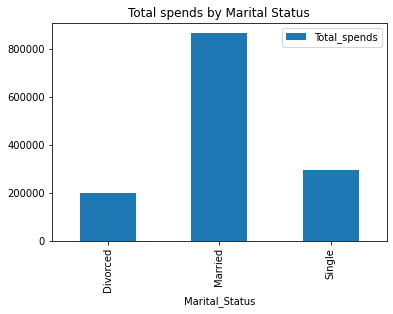

In [69]:
# Maritial Status grouping
temp =data.groupby(['Marital_Status']).sum()['Total_spends'].to_frame()
print(temp)
print()
temp.plot(kind='bar')
plt.title('Total spends by Marital Status')
plt.show()

Total spends by Income level

Income_bin
low       1356918
medium          0
high           62
Name: Total_spends, dtype: int64



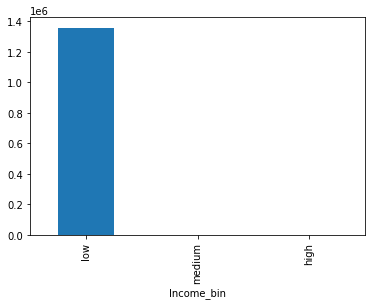

In [92]:
temp = data.groupby(['Income_bin']).sum()['Total_spends']
print (temp)
print()
temp.plot(kind='bar')

In [82]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'Total_spends', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Income_bin'],
      dtype='object')